# Assessed Problem #2

<html>
    <body>
        <p> $To \ give \ the \ best \ estimate \ for \ the \ gradient \ of \ the \ function \ at \ this \ point \ we \ will \ first \ need \ to \ give \ our \ most \\ accurate \ estimate \ for \ the \ continuous \ function \ that \ produced \ these \ points, \ there \ are \ two \ methods \ of \ doing \ this.$ </p>
        <p> $$  $$ </p>
        <p> $The \ first \ is \ interpolation \ and \ the \ second \ is \ curve \ fitting. \ Each \ have \ their \ own \ benefits \ and \ seek \ to \ achieve \ the \ same \\ goal \ however \ I \ am \ going \ to \ use \ a \ method \ of \ cubic \ interpolation \ to \ most \ accurately \ estimate \ the \ smooth \ function \\ that \ the \ function \ originally \ was \ defined \ as,$ </p>
        <p> $$  $$ </p>
        <p> $ \ this \ is \ due \ to \ the \ fact \ that \ as \ curve \ fitting \ method \ requires \ you \ to \ assume \ the \ nature \ of \ the \ curve \ with \ a \ function.$ </p>
        <p> $$  $$ </p>
        <p> $e.g. \ you \ optimally \ fit \ a \ cubic \ curve \ to \ a \ sinusoidal \ function. This \ will \ usually \ have \ more \ innacuracy \ than \ a \ local \ low \ order \\ polynomial \ spline \ see \ the \ example \ below:$</p>
        <p> $$  $$ </p>
    </body>
</html>

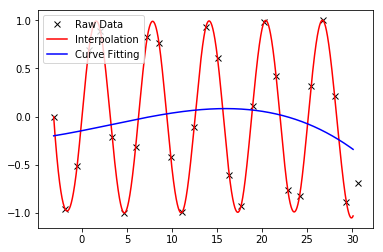

And this trend holds when there's an abundance of data too.


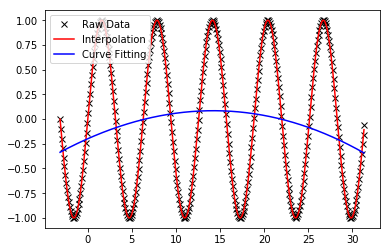

In [101]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
#

#Define Subroutines
def diff(f,x,h=0.00000000001):
    return (f(x+h)-f(x-h))/2/h
def cubicF(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
#

#Define Raw data
x = np.arange(-np.pi,10*np.pi,1.3)
y = np.sin(x)
#

x0 = np.arange(-np.pi,10*np.pi-1.3,0.01)
interpolate  = interp1d(x,y, kind = 'cubic')
Coe, Cov = curve_fit(cubicF,x,y)

plt.plot(x,y,'kx',label ="Raw Data")
plt.plot(x0,interpolate(x0),'r-',label ="Interpolation")
plt.plot(x0,cubicF(x0,Coe[0],Coe[1],Coe[2],Coe[3]),'b-',label ="Curve Fitting")
plt.legend()
plt.show()

print ("And this trend holds when there's an abundance of data too.")

#Define Raw data
x = np.arange(-np.pi,10*np.pi,0.1)
y = np.sin(x)
#

x0 = np.arange(-np.pi,10*np.pi-0.1,0.01)
interpolate  = interp1d(x,y, kind = 'cubic')
Coe, Cov = curve_fit(cubicF,x,y)

plt.plot(x ,y,'kx',label="Raw Data")
plt.plot(x0,interpolate(x0),'r-',label="Interpolation")
plt.plot(x0,cubicF(x0,Coe[0],Coe[1],Coe[2],Coe[3]),'b-',label="Curve Fitting")
plt.legend()
plt.show()

<html>
    <body>
        <p>$for \ these \ reasons \ I \ decided \ to \ use \ a \ cubic \ interpolation \ to \ model \ the \ continuous \ function \ of \ the \ raw \ data. \\ To \ find \ the \ gradient \ of \ this \ function, \ I \ added \ an \ equation \ of \ differentiation \ by \ first \ principles \ using \ this \\ Centred \ FD \ equation \ I \ minimized \ the \ error \ on \ the \ derivative \ value \ since \ the \ error \\ goes \ with \ h^2 \ instead \ of \ h^1 \ like \ the \ forward \ derivative.$</p>

        <p> $Forward \ FD:$ </p>
        <p> $$f'(x) = \frac{f(x+h)-f(x)}{h} + O(h)$$ </p>
        <p> $$ $$ </p>
        <p> $Centred \ FD$ </p>
        <p> $$f'(x) = \frac{f(x+h)-f(x-h)}{2h} + O(h^2)$$ </p>

        <p> $Using \ this \ I \ can \ plot \ a \ derivitive \ graph \ and \ also \ find \ the \ value \ of \ f'(0.2).$ </p>

    </body>
</html>

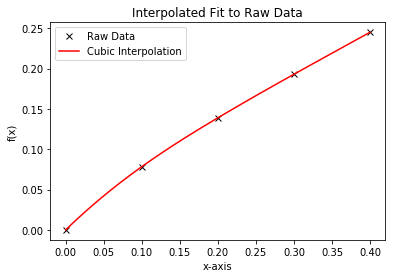

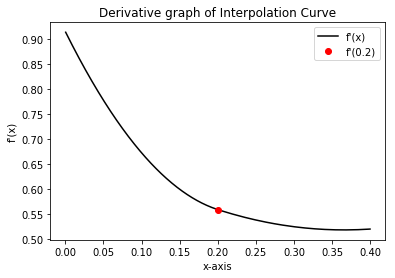

f'(0.2) = 0.5596


In [102]:
#Numerical Differentiation
#part 2a)

#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
#

#Define Subroutines
def diff(f,x,h=0.00000000001): #Returns the Centered FD of the input function at point x
    return (f(x+h)-f(x-h))/2/h
#

#Define Raw data
x = [0.     , 0.1     , 0.2    , 0.3    , 0.4    ]
y = [0.000000,0.078348,0.138910,0.192916,0.244981]
#

#Compute
x0 = np.linspace(0.,0.4,1000)  #Define a psuedo continuous x variable
f_cubic  = interp1d(x,y, kind = 'cubic')  #Use cubic interpolation to find a function for f(x) between the bounds of the raw data

plt.plot(x,y,'kx', label = "Raw Data") #Plot raw data using black x's
plt.plot(x0,f_cubic(x0), 'r-', label = "Cubic Interpolation") #Plot interpolation curve using the continuous variable and the function
plt.legend()
plt.title("Interpolated Fit to Raw Data")
plt.ylabel("f(x)")
plt.xlabel("x-axis")
plt.show()

x0  = x0[1:len(x0)-1]  #Trim one value off of either side of the raw data bounds
                       #This is because the centered DF equation requires values above and below the parameter
                       #Which is undefined outside of this x-range
dx0 = diff(f_cubic,x0) #Define the set of derivative values for x0
#

plt.plot(x0,dx0,'k-', markersize = 10, label = "f'(x)") #Plot the full derivative curve of f(x) between these bounds
plt.plot(0.2,diff(f_cubic,0.2),'ro',markersize=6, label = "f'(0.2)") #Plot a marker for f'(0.2)
plt.legend()
plt.title("Derivative graph of Interpolation Curve")
plt.ylabel("f'(x)")
plt.xlabel("x-axis")
plt.show()

print ("f'(0.2) = {:.4f}".format(diff(f_cubic,0.2))) #Print the quantitative value of f'(0.2) to 4 significant figures.

$Using \ the \ approximation \ in \ 1b) \ of \ the \ class \ problems$

$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^2)$$

$and \ the \ Richardson \ Extrapolation \ formula$

$$ G(x,h) = \frac{2^pg(x,\frac{h}{2})-g(x,h)}{2^p-1} + O(h^{2p}) $$

$substituting \ g(x,h) \ for \ f''(x,h) \ gives \ the \ Richardson \ Extrapolation \ formula \ for \ a \\ reduced \ error \ version \ of \ the \ central \ difference \ approximation.$


$$ R(x,h) = \frac{2^2f''(x,\frac{h}{2})-f''(x,h)}{2^2-1} + O(h^4) $$

$Using \ each \ value \ of \ h \ [0.1, \ 0.5] \ we \ can \ plot \ a \ graph \ of \ each \ of \ the \ approximations \ and \ make \ calculations \\ about \ the \ average \ error \ of \ the \ graph \ as \ well \ as \ the \ error \ at \ the \ 0 \ point$

Error on g(x,h = 0.1) is 5.91e-04
Error on G(x,h = 0.1) is 4.04e-08

Error on g(0,h = 0.1) is 8.34e-04
Error on G(0,h = 0.1) is 6.95e-08



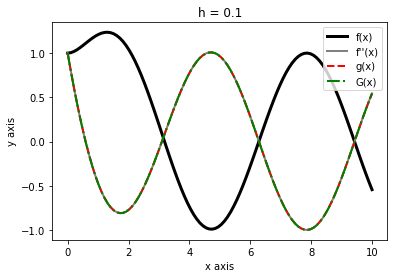

Error on g(x,h = 0.5) is 1.47e-02
Error on G(x,h = 0.5) is 2.51e-05

Error on g(0,h = 0.5) is 2.10e-02
Error on G(0,h = 0.5) is 4.36e-05



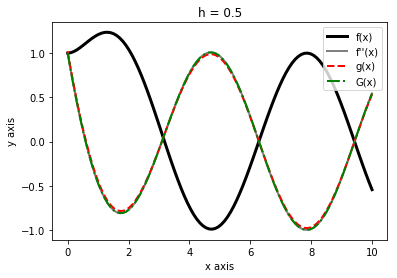

In [103]:
#Numerical Differentiation
#part 2b)

#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
#

#Define Subroutines
def f(x):      #returns the exact value of the equation being differentiated
    return np.sin(x) + np.exp(-x)
def df(x):     #returns the exact second derivative of the equation f(x)
    return -np.sin(x) + np.exp(-x)
def g(x,h):    #returns the second order central difference approximation for f(x)
    return (f(x+h)-2*f(x)+f(x-h))/h**2
def G(x,h, p): #returns the Richardson Extrapolation of g(x)
    return (2**p*g(x,h/2) - g(x,h))/(2**p-1)
#

#Define variables
n = 100                 # number of samples
t = np.linspace(0,10,n) # x axis distribution
#

#Computation
for h in [0.1, 0.5]: # This code is iterated twice, once for each value of h
    #The average errors of each graph are calculated and printed
    _errg = sum(np.abs(df(t)-g(t,h)  ))/n
    _errG = sum(np.abs(df(t)-G(t,h,2)))/n
    print("Error on g(x,h = " + str(h) + ") is {:.2e}".format(_errg))
    print("Error on G(x,h = " + str(h) + ") is {:.2e}".format(_errG))
    print()
    #The error on just the x=0 points are calculated and printed
    print("Error on g(0,h = " + str(h) + ") is {:.2e}".format(np.abs(df(0) - g(0,h  ))))
    print("Error on G(0,h = " + str(h) + ") is {:.2e}".format(np.abs(df(0) - G(0,h,2))))
    print()
    #Graphs are plotted
    plt.plot(t,f(t)     ,'-' , color = 'black', linewidth = 3, label = "f(x)")   #f(x)
    plt.plot(t,df(t)    ,'-' , color = 'grey' , linewidth = 2, label = "f''(x)") #f''(x)
    plt.plot(t,g(t,h)   ,'--', color = 'red'  , linewidth = 2, label = "g(x)")   #2nd Order Central FD
    plt.plot(t,G(t,h,2) ,'-.', color = 'green', linewidth = 2, label = "G(x)")   #Richardson Extrapolation
    plt.title("h = " + str(h))
    plt.ylabel("y axis")
    plt.xlabel("x axis")
    plt.legend()
    plt.show()
#

$Notice \ how \ the \ second \ derivative \ lines \ all \ seem \ to \ overlap \ when \ h \ = \ 0.1 \\ but \ the \ error \ becomes \ visible \ at \ this \ scale \ when \ h = 0.5. \ increasing \ h \ further \ increases \ the \ inaccuracy \ of \ the \ fits.$

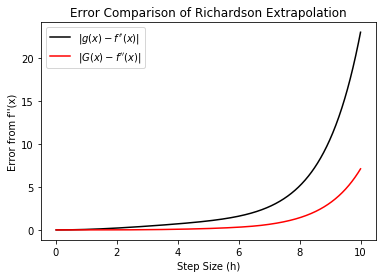

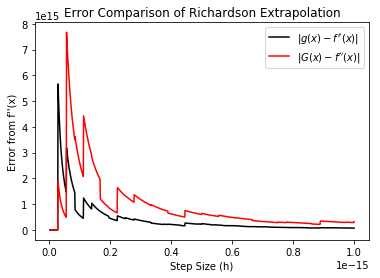

In [104]:
#Define Subroutines
def f(x):      #returns the exact value of the equation being differentiated
    return np.sin(x) + np.exp(-x)
def df(x):     #returns the exact second derivative of the equation f(x)
    return -np.sin(x) + np.exp(-x)
def g(x,h):    #returns the second order central difference approximation for f(x)
    return (f(x+h)-2*f(x)+f(x-h))/h**2
def G(x,h, p): #returns the Richardson Extrapolation of g(x)
    return (2**p*g(x,h/2) - g(x,h))/(2**p-1)
#

#Define variables
n = 100                   # number of samples
t = np.linspace(0.,10.,n) # x axis distribution
#

#Computation
for scale in [10,0.000000000000001]:
    H = np.linspace(0,scale,1001)[1:]
    _errg = []
    _errG = []
    for h in H:
        _errg.append(sum(np.abs(df(t)-g(t,h)  ))/n)
        _errG.append(sum(np.abs(df(t)-G(t,h,2)))/n)
    plt.plot(H,_errg, 'k-', label = "$|g(x) - f''(x)|$")
    plt.plot(H,_errG, 'r-', label = "$|G(x) - f''(x)|$")
    plt.legend()
    plt.title("Error Comparison of Richardson Extrapolation")
    plt.ylabel("Error from f''(x)")
    plt.xlabel("Step Size (h)")
    plt.show()
#

$Also \ note \ how \ at \ very \ small \ values \ of \ h, \ there \ are \ precision \ errors \ in \ the \ calculations \\ due \ to \ the \ bit \ allocation \ of \ floating \ point \ numbers \ being \ split \ between \ the \ coefficient \ and \ the \ exponent. \\ \ \\ I \ know \ most \ of \ this \ is \ unnecessary \ but \ I \ got \ bored \ and \ started \ experimenting \ with \ the \ limits \ of \ the \\ precision \ of \ this \ model \ and \ figured \ i'd \ just \ include \ it.$